# Proyek Analisis Data: E-Commerce-Public-Dataset
- **Nama:** Raihan Maulana
- **Email:** raihanmaulanazoom@gmail.com
- **ID Dicoding:** raihanmaulana04

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran seller di ecommerce? State mana yang memiliki seller paling banyak dan paling sedikit?
- Bagaimana score review dari customer? Berapa score tertinggi, terendah, serta rata-rata dari review Customer?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
customer_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")


In [76]:
# CUSTOMER 
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [77]:
# GEOLOCATION 
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [78]:
# ORDER ITEMS 
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [79]:
# ORDER PAYMENTS 
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [80]:
# ORDER REVIEWS
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [81]:
# ORDERS
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [82]:
# PRODUCT CATEGORY NAME
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [83]:
# PRODUCTS
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [84]:
# SELLERS
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Pada bagian ini, saya melakukan proses gathering data membaca setiap file format .csv dari dataset dengan menggunakan fungsi pd.read_csv yang berasal dari library Pandas.
- Setelah setiap data file berformat .csv dibaca oleh library Pandas, saya menampilkan data menggunakan fungsi {variabel_data.csv}.head() yang berasal dari library Pandas untuk menampilkan baris awal dari tabel yang ada di setiap dataset (5 baris pertama).

### Assessing Data

In [85]:
# CUSTOMERS
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [86]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [100]:
print("Duplicated data: ",customer_df.duplicated().sum())

Duplicated data:  0


In [118]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Data CUSTOMERS tidak memiliki missing values dan tidak ada duplikasi data.

In [87]:
# GEOLOCATION
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [88]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [101]:
print("Duplicated data: ",geolocation_df.duplicated().sum())

Duplicated data:  261831


In [119]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Data GEOLOCATION tidak memiliki missing values, tetapi memiliki banyak duplikasi data.

In [89]:
# ORDER ITEMS
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [90]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [102]:
print("Duplicated data: ",order_items_df.duplicated().sum())

Duplicated data:  0


In [120]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Data ORDER ITEMS tidak memiliki missing values dan tidak ada duplikasi data.

In [104]:
# ORDER PAYMENTS
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [105]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [106]:
print("Duplicated data: ",order_payments_df.duplicated().sum())

Duplicated data:  0


In [121]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Data ORDER PAYMENTS tidak memiliki missing values dan tidak ada duplikasi data.

In [92]:
# ORDER REVIEWS
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [93]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [107]:
print("Duplicated data: ",order_reviews_df.duplicated().sum())

Duplicated data:  0


In [122]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Data ORDER REVIEWS tidak memiliki missing values dan tidak memiliki duplikasi data.

In [94]:
# ORDERS INFO
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [109]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [110]:
print("Duplicated data: ",orders_df.duplicated().sum())

Duplicated data:  0


In [123]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Data ORDERS memiliki missing values, tetapi tidak ada duplikasi data.

In [111]:
# PRODUCT CATEGORY NAME INFO
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [112]:
product_category_name_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [113]:
print("Duplicated data: ",product_category_name_translation.duplicated().sum())

Duplicated data:  0


In [124]:
product_category_name_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Data PRODUCT CATEGORY NAME TRANSLATION tidak memiliki missing values dan tidak ada duplikasi data.

In [97]:
# PRODUCTS INFO
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [98]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [114]:
print("Duplicated data: ",products.duplicated().sum())

Duplicated data:  0


In [125]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Data PRODUCTS memiliki missing values, tetapi tidak ada duplikasi data.

In [115]:
# SELLERS INFO
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [116]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [117]:
print("Duplicated data: ",sellers.duplicated().sum())

Duplicated data:  0


In [126]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Data SELLERS tidak memiliki missing values dan tidak ada duplikasi data.

**Insight:**
- Pada proses Accessing Data, saya menggunakan fungsi info() untuk mengecek struktur tabel, fungsi isna().sum() untuk mengecek serta menghitung total missing values dari setiap data, fungsi duplicated().sum() untuk mengecek duplikasi data dan menghitung duplikasi dari setiap data, serta fungsi describe() untuk melihat struktur setiap data (tabel).
- Pada proses Accessing Data, terdapat beberapa data yang memiliki missing values serta duplikasi. Missing Values terdapat pada data ORDER REVIEWS, ORDERS, dan PRODUCTS. Duplikasi terdapat pada data Geolocation. Informasi ini akan saya gunakan untuk proses cleaning data.

### Cleaning Data

In [129]:
# CLEANING DATA GEOLOCATION
geolocation_df.drop_duplicates(inplace=True)

In [130]:
print("Duplicated data: ",geolocation_df.duplicated().sum())

Duplicated data:  0


Duplikasi pada data GEOLOCATION telah dihilangkan menggunakan metode Dropping.

In [127]:
# CLEANING ORDER REVIEWS
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [128]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [131]:
order_reviews_df['review_comment_title'].fillna('No Comment Title',inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment Message', inplace=True)

In [132]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Missing Value pada ORDER REVIEWS telah dicleaning dengan metode Imputation, saya mengganti setiap nilai NULL pada kolom review_comment_title menjadi "No Comment Title" dan untuk nilai review_comment_message menjadi "No Comment Message".

In [148]:
# CLEANING ORDERS
orders_df.dropna(axis=0, inplace=True)

In [149]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing Value pada ORDERS telah dicleaning dengan metode Dropping, saya memilih metode ini karena saya ingin lebih fokus pada data yang lengkap terutama untuk data yang statusnya delivered.

In [151]:
# CLEANING PRODUCTS
products.dropna(axis=0, inplace=True)

In [152]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Missing Values pada PRODUCTS telah dicleaning dengan metode Dropping, saya memilih metode ini agar lebih mudah melakukan analisis terhadap produk yang memiliki data lengkap.

**Insight:**
- Pada proses cleaning, saya menggunakan fungsi fullna() dari pandas untuk melakukan metode Imputation terhadap tabel order_reviews_df kolom review_comment_title dengan mengganti missing values ke string "No Comment Title", serta string "No Comment Message" untuk kolom review_coment_message. Sebab dalam melakukan transasksi di e-commerce customer tidak selalu memberikan ulasan secara detail, terkadang hanya memberi ulasan bintang.
- Pada proses cleaning, saya menggunakan fungsi dropna() untuk membuang missing value dalam tabel ORDERS serta tabel PRODUCTS untuk mempermudah saya mempersempit lingkup analisis data ke setiap data yang lengkap.

## Exploratory Data Analysis (EDA)

### Explore ...

In [155]:
# CUSTOMERS
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [156]:
# GEOLOCATION
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [157]:
# ORDER ITEMS
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [158]:
# ORDER PAYMENTS
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [159]:
# ORDER REVIEWS
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Comment Title,No Comment Message,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [160]:
# ORDERS
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,NaN,NaN,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,NaN,NaN,2017-12-20 00:00:00
freq,1,1,96455,3,9,NaN,NaN,507
mean,NaN,NaN,NaN,NaN,NaN,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,NaN
min,NaN,NaN,NaN,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,NaN
25%,NaN,NaN,NaN,NaN,NaN,2017-09-18 16:52:19,2017-09-25 22:31:59,NaN
50%,NaN,NaN,NaN,NaN,NaN,2018-01-24 16:19:03,2018-02-02 19:50:56,NaN
75%,NaN,NaN,NaN,NaN,NaN,2018-05-08 14:33:00,2018-05-15 23:08:54,NaN
max,NaN,NaN,NaN,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN


In [162]:
#PRODUCT CATEGORY NAME TRANSLATION
product_category_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [163]:
# PRODUCTS
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [164]:
# SELLERS
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [169]:
customer_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_zip_code_prefix": ["nunique", "max", "min", "mean", "std"]
})

customer_id customer_zip_code_prefix                \
                   nunique                  nunique    max    min   
customer_state                                                      
AC                      81                       20  69980  69900   
AL                     413                      126  57975  57010   
AM                     148                       55  69800  69005   
AP                      68                       18  68997  68900   
BA                    3380                      735  48990  40010   
CE                    1336                      384  63960  60010   
DF                    2140                      465  73402  70040   
ES                    2033                      265  29985  29010   
GO                    2020                      540  76730  72800   
MA                     747                      196  65980  65010   
MG                   11635                     1349  39995  30110   
MS                     715                      186  79995  79002   
MT                     907                      175  78890  78005   
PA                     975                      209  68820  66010   
PB                     536                      181  58995  58010   
PE                    1652                      439  56980  50010   
PI                     495                      154  64980  64000   
PR                    5045                      861  87990  80010   
RJ                   12852                     1199  28999  20010   
RN                     485                      177  59995  59010   
RO                     253                       75  76997  76801   
RR                      46                       15  69380  69301   
RS                    5466                      877  99990  90010   
SC                    3637                      517  89998  88010   
SE                     350                       89  49995  49000   
SP                   41746                     5591  19970   1003   
TO                     280                       96  77995  77001   

                                           
                        mean          std  
customer_state                             
AC              69914.604938    16.271662  
AL              57215.881356   264.487732  
AM              69078.445946   128.339859  
AP              68910.044118    16.388414  
BA              44102.125444  2742.967242  
CE              61619.897455  1235.201961  
DF              71665.655607   832.569925  
ES              29297.302017   279.183272  
GO              74992.567822   949.102285  
MA              65336.518072   323.616678  
MG              35211.344736  3022.661599  
MS              79341.079720   323.057722  
MT              78388.158765   278.717203  
PA              67332.297436  1074.676325  
PB              58273.382463   282.645125  
PE              53675.421308  2092.216949  
PI              64244.957576   295.125260  
PR              84251.639049  2323.187401  
RJ              23964.840803  2611.576123  
RN              59288.002062   268.854737  
RO              76876.928854    65.791057  
RR              69309.434783    11.750465  
RS              94748.404683  2845.300370  
SC              88818.525158   611.807756  
SE              49193.474286   254.080573  
SP               9250.356513  4987.349720  
TO              77426.560714   329.742894

In [170]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [30]:
sellers.groupby(by="seller_state").agg({
    "seller_id": "nunique",
    "seller_zip_code_prefix": ["nunique", "max", "min", "mean", "std"]
})

seller_id seller_zip_code_prefix                              \
               nunique                nunique    max    min          mean   
seller_state                                                                
AC                   1                      1  69900  69900  69900.000000   
AM                   1                      1  69005  69005  69005.000000   
BA                  19                     17  48602  40130  43579.842105   
CE                  13                     13  63540  60025  61282.153846   
DF                  30                     29  73020  70070  71565.066667   
ES                  23                     23  29704  29010  29215.217391   
GO                  40                     35  76500  72801  74764.800000   
MA                   1                      1  65072  65072  65072.000000   
MG                 244                    180  39801  30111  34850.000000   
MS                   5                      5  79400  79090  79162.600000   
MT                   4                      4  78820  78020  78371.750000   
PA                   1                      1  85960  85960  85960.000000   
PB                   6                      6  58865  58030  58338.833333   
PE                   9                      9  55602  50751  53219.444444   
PI                   1                      1  64033  64033  64033.000000   
PR                 349                    219  87900  80010  84117.406877   
RJ                 171                    138  28990  20020  23710.941520   
RN                   5                      5  59775  21210  51646.800000   
RO                   2                      2  76900  76804  76852.000000   
RS                 129                    105  99730  90010  94481.379845   
SC                 190                    134  89900  88010  88830.521053   
SE                   2                      2  49980  49055  49517.500000   
SP                1849                   1333  95076   1001  10342.107085   

                            
                       std  
seller_state                
AC                     NaN  
AM                     NaN  
BA             2518.544361  
CE             1139.329104  
DF              829.262486  
ES              176.847381  
GO              820.112287  
MA                     NaN  
MG             2924.217840  
MS              132.961649  
MT              380.235344  
PA                     NaN  
PB              300.742692  
PE             1962.325413  
PI                     NaN  
PR             2496.465161  
RJ             2687.870142  
RN            17017.391154  
RO               67.882251  
RS             2573.471328  
SC              523.524136  
SE              654.073773  
SP             9898.099296

In [34]:
sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [41]:
order_reviews_df.groupby('review_score').size()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
dtype: int64

**Insight:**
- Pada proses ini, saya dapat melihat deskripsi detail dari setiap tabel yang ada pada dataset (CUSTOMERS, GEOLOCATION, ORDER ITEMS, ORDER PAYMENTS, ORDER REVIEW, ORDERS, PRODUCT CATEGORY, PRODUCTS, serta SELLERS [9 tabel]), hal ini membantu saya untuk menganalisis data lebih lanjut.
- Pada proses ini, saya dapat melihat persebaran Customer dengan memanfaatkan zip pos (kode pos) setiap Customer dan melihat statistik unique (unik) dari kolom yang ada. Serta saya dapat melihat persebaran data customer di cells berikutnya untuk mengetahui kota mana yang memiliki Customer yang banyak karena diurutkan dari tertinggi ke terendah. Metode yang serupa saya lakukan juga pada tabel SELLERS dan ORDER REVIEWS.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana persebaran seller di ecommerce? State mana yang memiliki seller paling banyak dan paling sedikit?

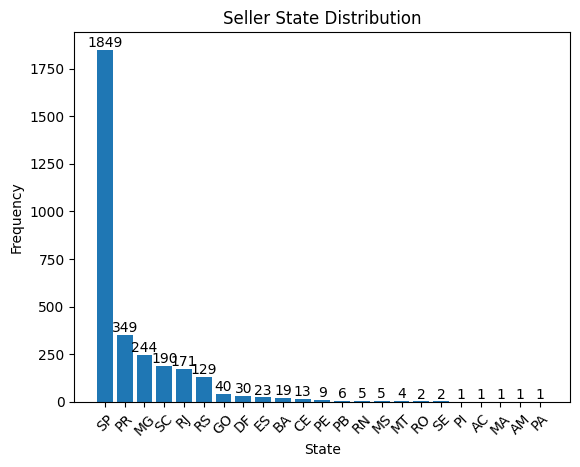

In [200]:
state_counts = sellers['seller_state'].value_counts()

bars = plt.bar(state_counts.index, state_counts.values)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Seller State Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.show()

### Pertanyaan 2:

Bagaimana score review dari customer? Berapa score tertinggi, terendah, serta rata-rata dari review Customer?

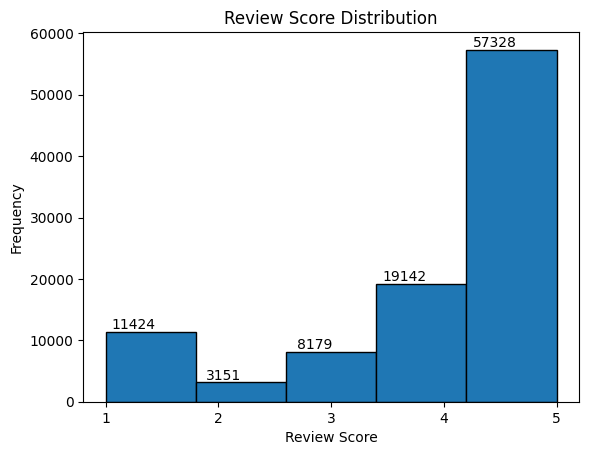

Max Score: 5
Min Score: 1
AVG Score: 4.09


In [38]:
max_score = order_reviews_df['review_score'].max()
min_score = order_reviews_df['review_score'].min()
avg_score = order_reviews_df['review_score'].mean()

counts, bins, patches = plt.hist(order_reviews_df['review_score'], bins=5, edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.title('Review Score Distribution')

for count, x in zip(counts, bins):
    plt.text(x + 0.25, count, int(count), ha='center', va='bottom')

plt.show()

print(f'Max Score: {max_score}')
print(f'Min Score: {min_score}')
print(f'AVG Score: {avg_score:.2f}')

**Insight:**
- Pada proses ini, dengan memanfaatkan library matplotlib.pyplot saya dapat melihat persebaran data dari tabel SELLERS dimana pada kasus ini saya mencari distribusi tabel SELLERS berdasarkan state nya.
- Pada proses ini juga saya dapat memvisualisasikan rating ke dalam diagram batang dan melihat persebaran score yang didapat dari tabel ORDER_REVIEWS.
- Kedua visualisasi ini memudahkan saya untuk memahami persebaran data dari E-Commerce.

## Analisis Lanjutan (Opsional)

## Conclusion

- (CONCLUSION 1) Berdasarkan visualisasi yang telah diproses dari proses analisis data, distribusi SELLER berdasarkan STATE nya terbagi menjadi 23 Wilayah/State. Dari data tersebut dapat dilihat STATE SP adalah wilayah dengan SELLER terbanyak, yaitu dengan total 1849 SELLERS. Seller terendah terdapat di STATE PI, AC, MA, AM, dan PA. Saya dapat menyusun daftar SELLER terbanyak berdasarkan STATE nya, yaitu sebagai berikut:
   * SP (1849 SELLERS)
   * PR (349 SELLERS)
   * MG (244 SELLERS)
   * SC (190 SELLERS)
   * RJ (171 SELLERS)
   * RS (129 SELLERS)
   * GO (40 SELLERS)
   * DF (30 SELLERS)
   * ES (23 SELLERS)
   * BA (19 SELLERS)
   * CE (13 SELLERS)
   * PE (9 SELLERS)
   * PB (6 SELLERS)
   * RN (5 SELLERS)
   * MS (5 SELLERS)
   * MT (4 SELLERS)
   * RO (2 SELLERS)
   * SE (2 SELLERS)
   * PI (1 SELLERS)
   * AC (1 SELLERS)
   * MA (1 SELLERS)
   * AM (1 SELLERS)
   * PA (1 SELLERS)
Dengan demikian, SELLER terbanyak berasal dari STATE SP dengan total 1849 SELLERS, sedangkan SELLER paling sedikit terbagi ke beberapa STATE yaitu PI, AC, MA, AM, PA masing-masing sebanyak 1 SELLER.

- (CONCLUTION 2) Berdasarkan visualisasi yang didapat, terlihat distribusi SCORE berdasarkan nilai SCORE nya, yaitu
   * Score 1 (11.424 data)
   * Score 2 (3151 data)
   * Score 3 (8179 data)
   * Score 4 (19.142 data)
   * Score 5 (57.328 data)
Dengan demikian, nilai SCORE tertinggi yang didapat adalah Score 5 dengan banyak data 57.328, serta SCORE terendah berada pada Score 2 sebanyak 3151 data, serta rata-rata keseluruhan adalah 4.09 yang menandakan performa e-commerce cukup baik.

In [42]:
# MERGE DATA FROM PROCESS
main_data = pd.concat([order_reviews_df, sellers], axis=1)
main_data.to_csv('main_data.csv', index=False)